In [19]:
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
file_path = "Attention Span Survey (Responses) - Form Responses.csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand its structure
df.head()

,Timestamp,"Roughly, what is the proportion of time you spend on watching short video (TikTok, Red Note, Reels, Youtube Shorts) vs long video (Bilibili, Youtube) each week?",Do you have a preferred video format?,What is the most likely reason you stop watching a video?,What attributes or elements of a long video make it more engaging?,Do you experience any decline of attention span in your daily life?,"If so, where do you experience it?",Would you blame the decline of attention span to watching short videos?,Do you actively search for content or rely on recommendations?,Which of the following is the most likely reason you would share a video with your friends?,Did you lose focus while completing this survey? Please be honest with us!
0,2/4/2025 9:41:52,75% short videos to 25% long videos,Short Videos,Boring content,Compelling Storytelling – A well-structured na...,Yes,"Having difficulty focusing on reading, Can't f...",Yes,Both,Funny Content,No (lie)
1,2/4/2025 9:47:03,25% short videos to 75% long videos,Long Videos,Content is different from what I expected,Compelling Storytelling – A well-structured na...,Yes,"Having difficulty focusing on reading, Can't f...",No,Both,Funny Content,No
2,2/4/2025 9:47:44,50% short videos to 50% long videos,Long Videos,Content is different from what I expected,Informative or Educational Value – Provides ne...,Yes,"Can't focus in class, Having trouble managing ...",Yes,Both,Funny Content,Yes
3,2/4/2025 9:54:58,25% short videos to 75% long videos,Long Videos,Boring content,Compelling Storytelling – A well-structured na...,No,NaN,No,Both,Funny Content,No
4,2/4/2025 10:11:17,75% short videos to 25% long videos,No,reached Ad,Compelling Storytelling – A well-structured na...,No,NaN,Yes,Both,Emotional resonance,No


In [21]:
df.columns = [
    "Timestamp",
    "Video Proportion",
    "Preferred Format",
    "Stop Watching Reason",
    "Engaging Attributes",
    "Attention Decline",
    "Decline Context",
    "Blame Short Videos",
    "Search vs. Recommendation",
    "Share Reason",
    "Lost Focus"
]

In [22]:
preferred_format_counts = df["Preferred Format"].value_counts()
preferred_format_counts

Preferred Format
Long Videos     12
Short Videos     7
No               7
Name: count, dtype: int64

In [23]:
video_proportion_counts = df["Video Proportion"].value_counts()
video_proportion_counts

Video Proportion
25% short videos to 75% long videos    11
50% short videos to 50% long videos     7
75% short videos to 25% long videos     5
I only watch short videos               3
Name: count, dtype: int64

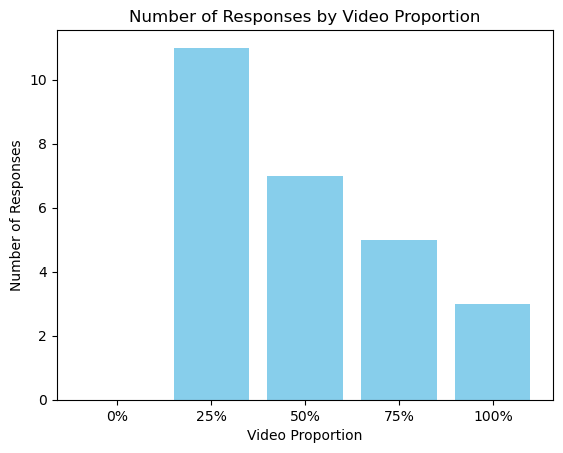

In [24]:
# seperate the dataset into four groups according to video proportion
df_0 = df[df["Video Proportion"] == "I only watch long videos"]
df_25 = df[df["Video Proportion"] == "25% short videos to 75% long videos"]
df_50 = df[df["Video Proportion"] == "50% short videos to 50% long videos"]
df_75 = df[df["Video Proportion"] == "75% short videos to 25% long videos"]
df_100 = df[df["Video Proportion"] == "I only watch short videos"]
# Count the number of responses for each group
counts = [len(df_0), len(df_25), len(df_50), len(df_75), len(df_100)]
# Create a bar chart
plt.bar(
    ["0%", "25%", "50%", "75%", "100%"], counts, color="skyblue"
)
plt.xlabel("Video Proportion")
plt.ylabel("Number of Responses")
plt.title("Number of Responses by Video Proportion")
plt.show()

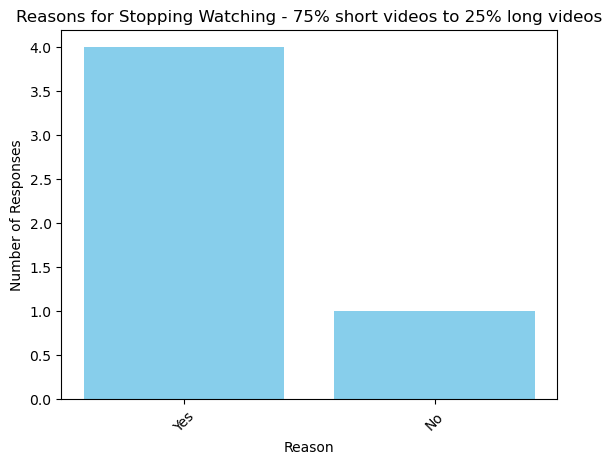

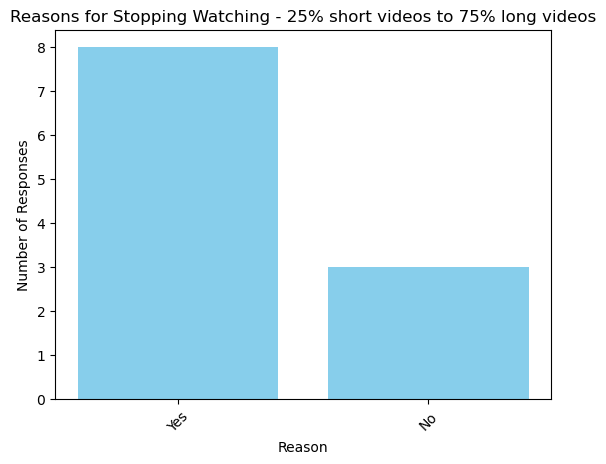

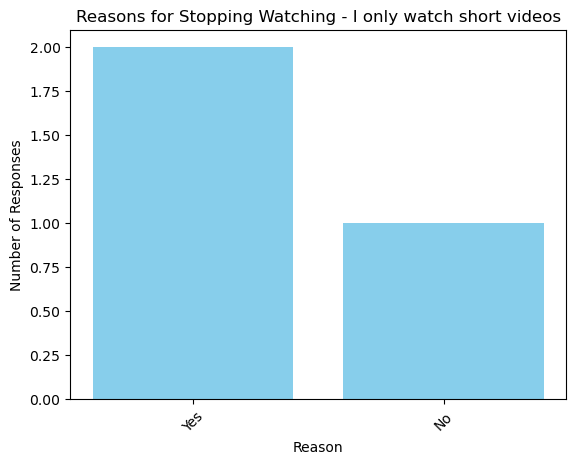

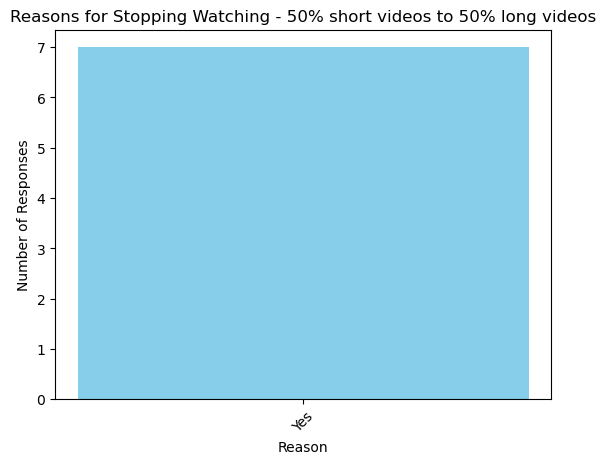

In [25]:
for group in set(df["Video Proportion"]):
    group_df = df[df["Video Proportion"] == group]
    counts = group_df["Attention Decline"].value_counts()
    plt.bar(counts.index, counts.values, color="skyblue")
    plt.xlabel("Reason")
    plt.ylabel("Number of Responses")
    plt.title(f"Reasons for Stopping Watching - {group}")
    plt.xticks(rotation=45)
    plt.show()

In [26]:
# Correlation between "Video Proportion" and "Attention Decline"
df["Video Proportion"] = df["Video Proportion"].map({
    "I only watch long videos": 0,
    "25% short videos to 75% long videos": 25,
    "50% short videos to 50% long videos": 50,
    "75% short videos to 25% long videos": 75,
    "I only watch short videos": 100
})
df["Attention Decline"] = df["Attention Decline"].map({
    "Yes": 1,
    "No": 0
})
correlation = df["Video Proportion"].corr(df["Attention Decline"])
print(f"Correlation between Video Proportion and Attention Decline: {correlation}")

Correlation between Video Proportion and Attention Decline: 9.187681059950008e-18


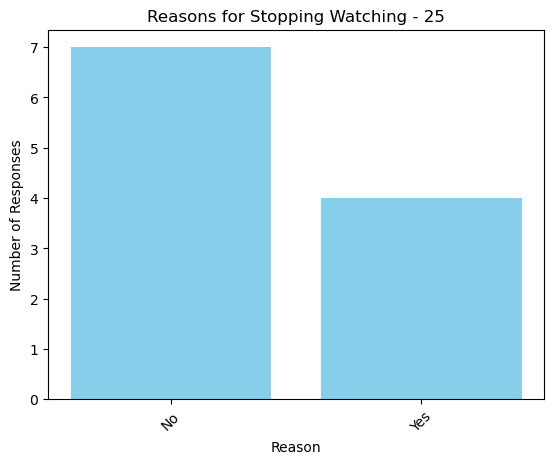

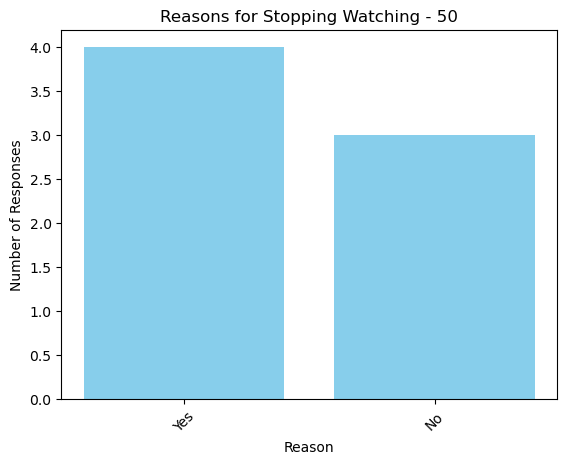

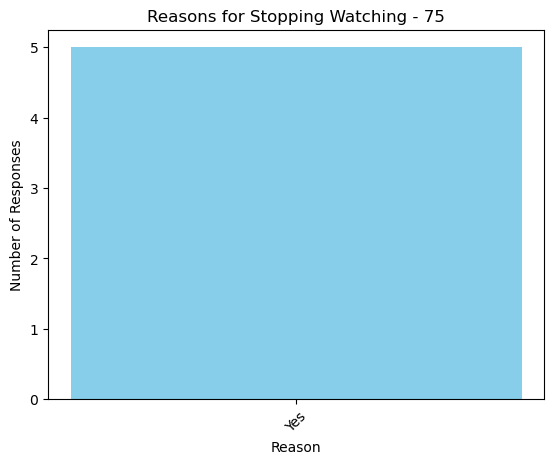

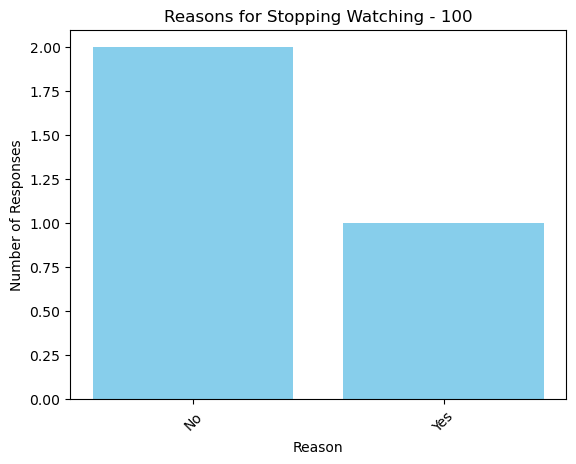

In [27]:
for group in set(df["Video Proportion"]):
    group_df = df[df["Video Proportion"] == group]
    counts = group_df["Blame Short Videos"].value_counts()
    plt.bar(counts.index, counts.values, color="skyblue")
    plt.xlabel("Reason")
    plt.ylabel("Number of Responses")
    plt.title(f"Reasons for Stopping Watching - {group}")
    plt.xticks(rotation=45)
    plt.show()

In [28]:
# Correlation between "Video Proportion" and "Attention Decline"
df["Video Proportion"] = df["Video Proportion"].map({
    "I only watch long videos": 0,
    "25% short videos to 75% long videos": 25,
    "50% short videos to 50% long videos": 50,
    "75% short videos to 25% long videos": 75,
    "I only watch short videos": 100
})
df["Blame Short Videos"] = df["Blame Short Videos"].map({
    "Yes": 1,
    "No": 0
})
correlation = df["Video Proportion"].corr(df["Blame Short Videos"])
print(f"Correlation between Video Proportion and Blame Short Videos: {correlation}")

Correlation between Video Proportion and Blame Short Videos: nan


In [32]:
stop_watching_counts = df["Attention Decline"].value_counts()
stop_watching_counts

Attention Decline
1    21
0     5
Name: count, dtype: int64

In [30]:
blame_short_videos_counts = df["Blame Short Videos"].value_counts()
blame_short_videos_counts

Blame Short Videos
1    14
0    12
Name: count, dtype: int64

In [31]:
df["Lost Focus"].value_counts()

Lost Focus
No          18
No (lie)     4
Yes          4
Name: count, dtype: int64